In [63]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


In [64]:
data = load_digits()


In [65]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [66]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [67]:
df.shape

(1797, 65)

In [68]:
data = df.drop('target', axis='columns')
target = df.target


In [69]:
print(data.shape)
print(target.shape)


(1797, 64)
(1797,)


8


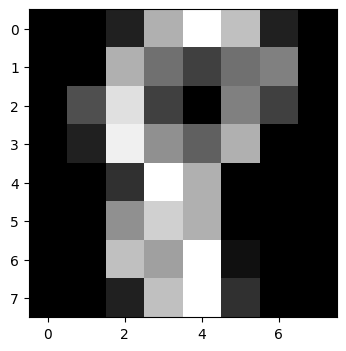

In [70]:
#reshape the data vector into 8X8 matrix and display the image
plt.figure(figsize=(20, 4))
index = 284
plt.imshow(np.array(data.iloc[index]).reshape(8, 8), cmap='gray')
print(target[index])

# 2d Visulatization

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standartized_data = scaler.fit_transform(data)
print(standartized_data.shape)
# standartized_data = data 

(1797, 64)


In [72]:
#find the covariance matrix which is A^T * A
covar_matrix = np.matmul(standartized_data.T, standartized_data)
print(covar_matrix.shape)


(64, 64)


In [74]:
# get the top two eigen values and eigen vectors
from scipy.linalg import eigh
values, vectors = eigh(covar_matrix, subset_by_index=[62, 63])
print("Shape of eigen vectors = ", vectors.shape)
vectors = vectors.T
print("Updated shape of eigen vectors = ", vectors.shape)


Shape of eigen vectors =  (64, 2)
Updated shape of eigen vectors =  (2, 64)


In [75]:
modified_data = np.matmul(vectors , standartized_data.T)
print(f"The shape of the new data point is {vectors.shape} X { standartized_data.T.shape} = {modified_data.shape}")

The shape of the new data point is (2, 64) X (64, 1797) = (2, 1797)


In [76]:
new_data = np.vstack((modified_data, target)).T
print(new_data.shape)


(1797, 3)


In [77]:
#creating dataframe for the given data for visualization 
df = pd.DataFrame(new_data, columns=["1st_principal", "2nd_principal", "target"])
print(df.head())


   1st_principal  2nd_principal  target
0       0.954502       1.914214     0.0
1      -0.924636       0.588980     1.0
2       0.317189       1.302039     2.0
3       0.868772      -3.020770     3.0
4       1.093480       4.528949     4.0


<Figure size 1000x1000 with 0 Axes>

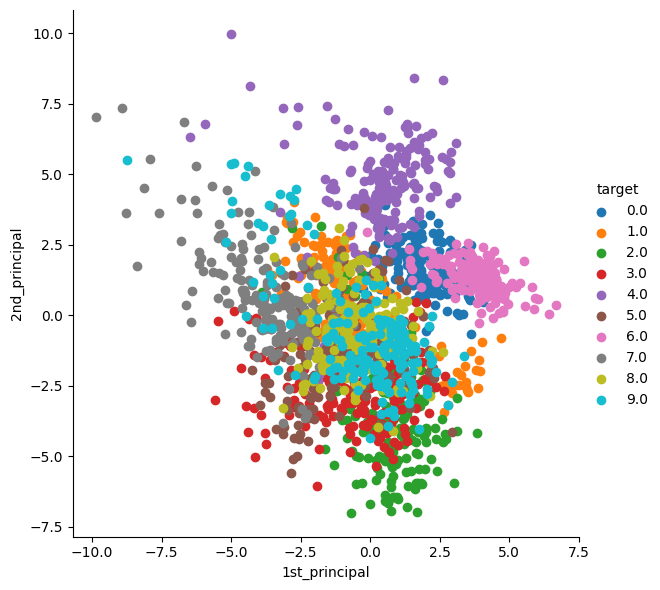

In [78]:
#plot a 2d scatter plot using matplotlib
plt.figure(figsize=(10, 10))
import seaborn as sns
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()


In [114]:
#Number of PCA components required to explain 95% of the variance in the data
values, vectors = eigh(covar_matrix)
var = 0 
for i in range(63,0,-1):
    var += values[i]/sum(values)
    if var >= 0.99:
        break

print(f"It requires {63-i+1} PCA components to explain 99% of the variance in the data.")



It requires 54 PCA components to explain 99% of the variance in the data.


# PCA using sci-kit learn


In [60]:
from sklearn.decomposition import PCA 

n_components = 2 
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(data)


In [61]:
all_data = np.vstack((pca_result.T, target)).T
df = pd.DataFrame(all_data, columns=["1st_principal", "2nd_principal", "target"])

<Figure size 1000x1000 with 0 Axes>

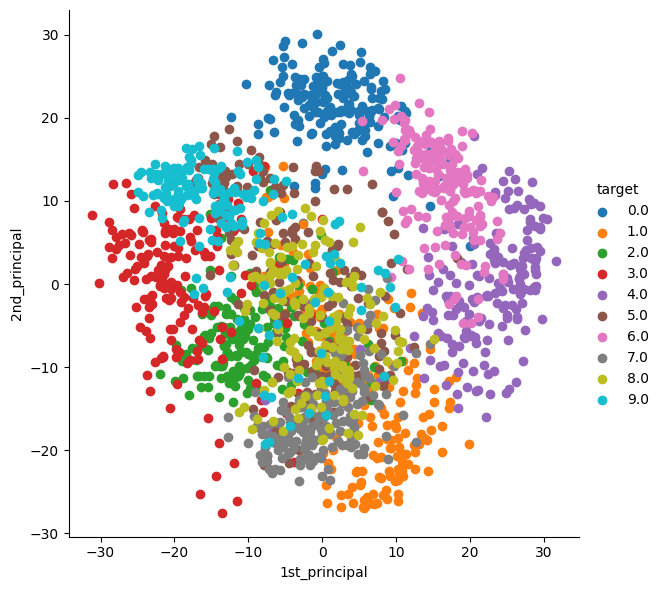

In [62]:
plt.figure(figsize=(10, 10))
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [ ]:
# PCA for data without standartization without using sklearn

sample_data = data
covar_matrix = np.matmul(sample_data.T, sample_data)
print("The shape of the covariance matrix = ", covar_matrix.shape)
